# Simulated Waves on a String

* To get started: Hit Shift-Enter repeatedly until you arive at the last cell
* Then: Start playing with/modifying different pieces. Hit Ctrl-Enter to the end to re-run the code.
* Every cell that's not marked as inscrutable is meant to be understood, at least at some level.

In [36]:
# (inscrutable setup mumbo-jumbo)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from numba import jit as execute_quickly
%matplotlib inline
 
def show_field(f, vmin=None, vmax=None, **kwargs):
    if vmin is not None and vmax is not None:
        plt.ylim([vmin, vmax])
    return plt.plot(x, f)

In [37]:
x = np.linspace(-1, 1, 1000)

dx = x[1] - x[0]
dt = 0.5 * dx

In [38]:
# point source
initial_field = np.exp(-500*(x**2))

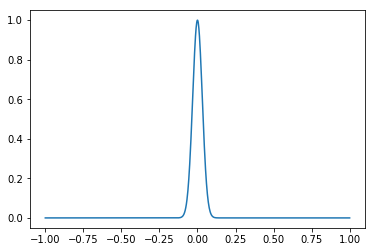

In [39]:
show_field(initial_field)

This next cell says:

* The restoring force acting on the wave surface is proportional to the "bendiness" of the surface.

* "Bendiness" is measured by the second derivative

* The second derivative is approximated using so-called [finite differences](https://en.wikipedia.org/wiki/Finite_difference#Higher-order_differences)

In [40]:
@execute_quickly
def bendiness(f, dx):
    result = np.zeros_like(f)
    
    m, = f.shape
    for i in range(1, m-1):
        result[i] = (
            1/dx**2 * (f[i-1] - 2*f[i] + f[i+1])
            )
            
    return result

In [41]:
ntimes = 3000
nvideo_frames = 100

fields_for_video = np.empty((nvideo_frames,) + x.shape)
velocity = np.zeros_like(initial_field)

field = initial_field 
for i in range(ntimes):
    fields_for_video[i//(ntimes//nvideo_frames)] = field
    
    field = field + dt * velocity
    velocity += dt * bendiness(field, dx)

In [42]:
# inscrutable video rendering mumbo-jumbo - execute to see video
# This is yucky and not intended for the students to mess with/understand.

fig = plt.figure(figsize=(10, 7))

vmax = np.max(np.abs(fields_for_video))
img, = show_field(initial_field, vmax=vmax, vmin=-vmax)
    
def animate(i):
    img.set_data((x, fields_for_video[i]))
    return (img,)

anim = animation.FuncAnimation(
    fig, animate, frames=nvideo_frames, interval=50, blit=True)

from IPython.display import HTML
html = HTML(anim.to_html5_video())
plt.clf()

html